test çalışması 

In [42]:
import pandas as pd 
import numpy as np 

In [43]:
recipes = pd.read_csv("recipes.csv")
print("Data okundu")

Data okundu


In [44]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
#print("column_names",column_names)
#print("##########################")
#print("column_names[0]",column_names[0])
#print("##########################")
column_names[0] = "cuisine"
#print("column_names[0]",column_names[0])
#print("##########################")
#print("column_names: ", column_names)
recipes.columns = column_names
#print("##########################")
#print("recipes.columns:",recipes.columns)

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
#print("recipes_counts: ",recipes_counts)
cuisines_indices = recipes_counts > 50
#print("cuisines_indices: ",cuisines_indices)

#print("##########################")
#print("recipes_counts.index: ", recipes_counts.index)
#print("recipes_counts.index.values",recipes_counts.index.values)
#print("np.array(cuisines_indices)",np.array(cuisines_indices))
#print("list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])", list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)]))

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
#print("cuisines_to_keep: ",cuisines_to_keep)
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]
#print("recipes-----",recipes)
# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

<ipython-input-44-bf559508fd1c>:67: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace(to_replace="No", value=0)


In [45]:
# cuisine sütununda tekrarlayan değerlerin toplamını yazdırdık 
recipes_counts = recipes["cuisine"].value_counts()
print(recipes_counts)

cuisine
american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       329
japanese                     320
mediterranean                289
thai                         289
german                       289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
easterneuropean_russian      146
cajun_creole                 146
moroccan                     137
african                      115
so

In [46]:
# 50 den büyük olanları bir değişkene atadık
cusinies_indices = recipes_counts > 50
print(cusinies_indices)

cuisine
american                   True
italian                    True
mexican                    True
french                     True
asian                      True
east_asian                 True
korean                     True
canadian                   True
indian                     True
western                    True
chinese                    True
spanish_portuguese         True
uk-and-irish               True
southern_soulfood          True
jewish                     True
japanese                   True
mediterranean              True
thai                       True
german                     True
scandinavian               True
middleeastern              True
central_southamerican      True
eastern-europe             True
greek                      True
english_scottish           True
caribbean                  True
easterneuropean_russian    True
cajun_creole               True
moroccan                   True
african                    True
southwestern               True


In [47]:
# True olan değerleri bir list içine yazdırdık 
cusinies_to_keep = list(np.array(recipes_counts.index.values)[np.array(cusinies_indices)])
print("cusinies_to_keep",cusinies_to_keep, type(cusinies_to_keep))

cusinies_to_keep ['american', 'italian', 'mexican', 'french', 'asian', 'east_asian', 'korean', 'canadian', 'indian', 'western', 'chinese', 'spanish_portuguese', 'uk-and-irish', 'southern_soulfood', 'jewish', 'japanese', 'mediterranean', 'thai', 'german', 'scandinavian', 'middleeastern', 'central_southamerican', 'eastern-europe', 'greek', 'english_scottish', 'caribbean', 'easterneuropean_russian', 'cajun_creole', 'moroccan', 'african', 'southwestern', 'south-america', 'vietnamese', 'north-african'] <class 'list'>


In [48]:
# True olan cuisinese sütunu altında true olan değerleri karşılarındaki diğer satılar ile seçer 
recipes = recipes.loc[recipes["cuisine"].isin(cusinies_to_keep)]
print(recipes)

          cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0      vietnamese       0         0      0           0      0             0   
1      vietnamese       0         0      0           0      0             0   
2      vietnamese       0         0      0           0      0             0   
3      vietnamese       0         0      0           0      0             0   
4      vietnamese       0         0      0           0      0             0   
...           ...     ...       ...    ...         ...    ...           ...   
57686    japanese       0         0      0           0      0             0   
57687    japanese       0         0      0           0      0             0   
57688    japanese       0         0      0           0      0             0   
57689    japanese       0         0      0           0      0             0   
57690    japanese       0         0      0           0      0             0   

       apricot  armagnac  artemisia  ...  whiskey  

In [49]:
# yes değerlerini 1, no değerlerini 0 yapar 
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)
print(recipes)

          cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0      vietnamese       0         0      0           0      0             0   
1      vietnamese       0         0      0           0      0             0   
2      vietnamese       0         0      0           0      0             0   
3      vietnamese       0         0      0           0      0             0   
4      vietnamese       0         0      0           0      0             0   
...           ...     ...       ...    ...         ...    ...           ...   
57686    japanese       0         0      0           0      0             0   
57687    japanese       0         0      0           0      0             0   
57688    japanese       0         0      0           0      0             0   
57689    japanese       0         0      0           0      0             0   
57690    japanese       0         0      0           0      0             0   

       apricot  armagnac  artemisia  ...  whiskey  

In [50]:
# import decision trees scikit-learn libraries

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# If running locally, you can try using the graphviz library but we'll use sklearn's plot_tree method
# !conda install python-graphviz --yes
# from sklearn.tree import export_graphviz

import itertools

In [51]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# select subset of cuisines
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
cuisines = asian_indian_recipes["cuisine"]
ingredients = asian_indian_recipes.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")


Decision tree model saved to bamboo_tree!


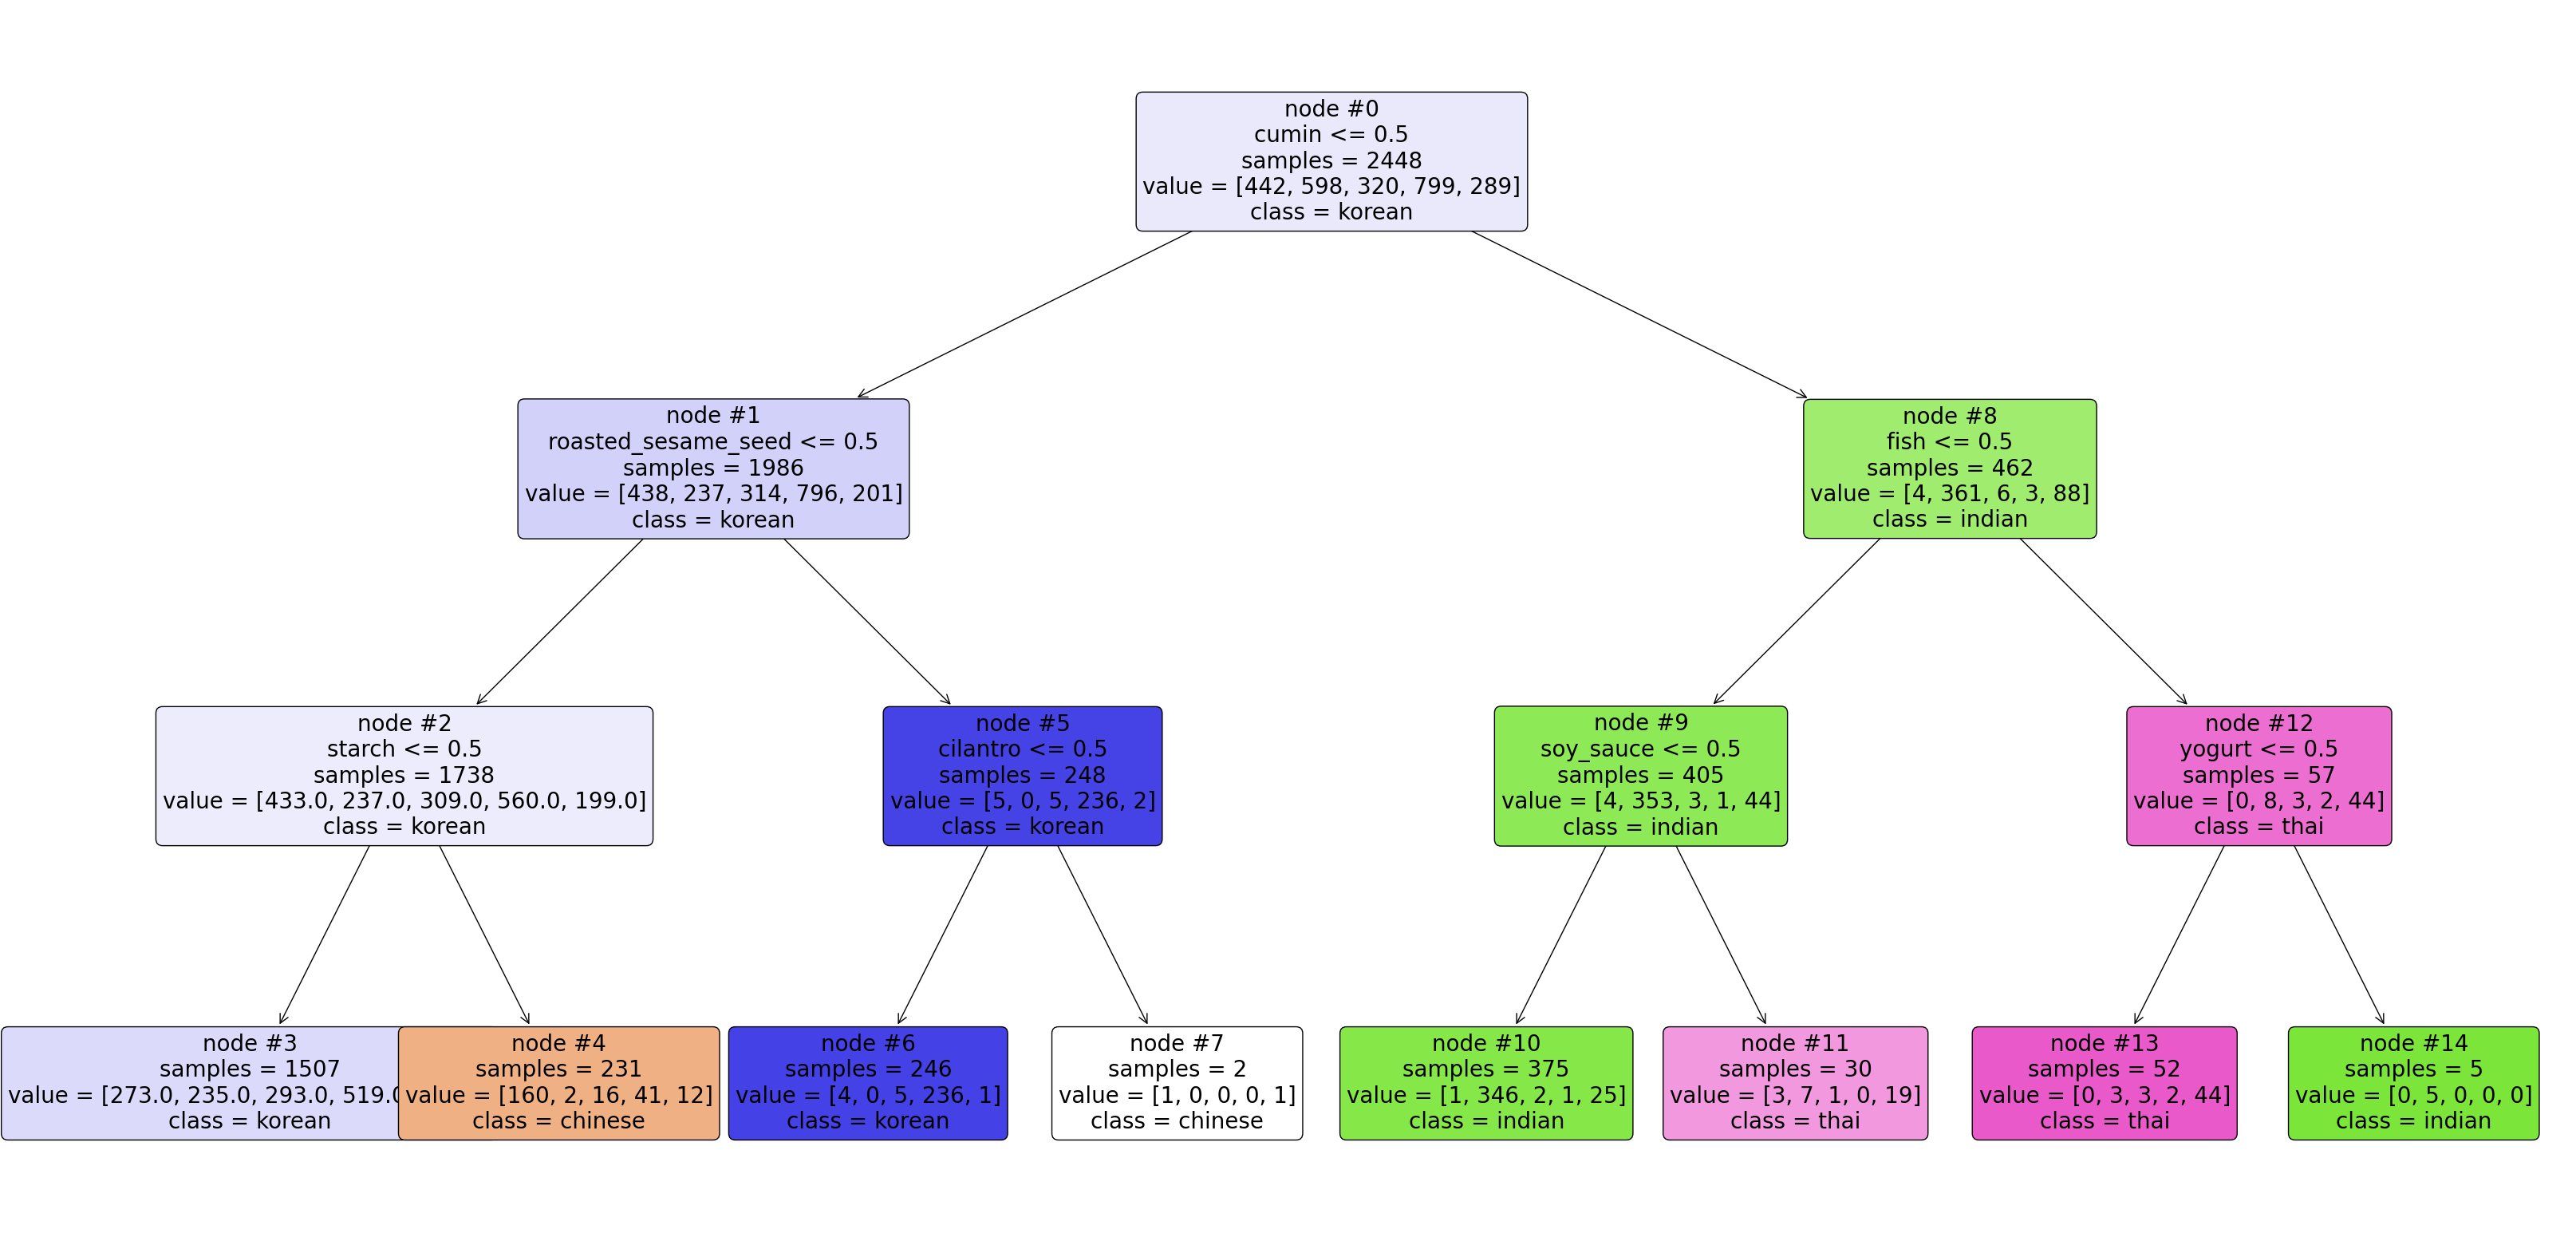

In [53]:
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

In [54]:
# adı verilen ülkelerin değerlerini çağırdık
# eski tipi country di, yeni adı cuisine oldu
# değer çağırmak için recipes[recipes.cuisine.isin() ile cuisin içinden değerleri çekebiliriz. 

bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
print("bamboo: ",bamboo)

bamboo:          cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
65       indian       0         0      0           0      0             0   
66       indian       1         0      0           0      0             0   
67       indian       0         0      0           0      0             0   
68       indian       0         0      0           0      0             0   
69       indian       0         0      0           0      0             0   
...         ...     ...       ...    ...         ...    ...           ...   
57686  japanese       0         0      0           0      0             0   
57687  japanese       0         0      0           0      0             0   
57688  japanese       0         0      0           0      0             0   
57689  japanese       0         0      0           0      0             0   
57690  japanese       0         0      0           0      0             0   

       apricot  armagnac  artemisia  ...  whiskey  white_bread  wh

In [55]:
# cusine ile belirttiğimiz ülkelerden kaçar tane var ona bakıyorun 
bamboo["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

In [58]:
import random # library for random number generation
sample_n = 30 

In [60]:
random.seed(1234)

# her bir ülke için 30 değer aldık 
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))
print(bamboo_test)                                                               

<ipython-input-60-e102d197e9d5>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))


       cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
19577  chinese       0         0      0           0      0             0   
19521  chinese       0         0      0           0      0             0   
19587  chinese       0         0      0           0      0             0   
13465  chinese       0         0      0           0      0             0   
10737  chinese       0         0      0           0      0             0   
...        ...     ...       ...    ...         ...    ...           ...   
2423      thai       0         0      0           0      0             0   
2390      thai       0         0      0           0      0             0   
2482      thai       0         0      0           0      0             0   
55542     thai       0         0      0           0      0             0   
2472      thai       0         0      0           0      0             0   

       apricot  armagnac  artemisia  ...  whiskey  white_bread  white_wine  \
19577    

In [63]:
# ülkeler ve aldıkları değerlerin ayrımlarını yaptık 

bamboo_test_ingredientes = bamboo_test.iloc[:,1:]
print("bamboo_test_ingredientes",bamboo_test_ingredientes)

bamboo_test_cuisines = bamboo_test["cuisine"]
print("bamboo_test_cuisines",bamboo_test_cuisines)

bamboo_test_ingredientes        almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
19577       0         0      0           0      0             0        0   
19521       0         0      0           0      0             0        0   
19587       0         0      0           0      0             0        0   
13465       0         0      0           0      0             0        0   
10737       0         0      0           0      0             0        0   
...       ...       ...    ...         ...    ...           ...      ...   
2423        0         0      0           0      0             0        0   
2390        0         0      0           0      0             0        0   
2482        0         0      0           0      0             0        0   
55542       0         0      0           0      0             0        0   
2472        0         0      0           0      0             0        0   

       armagnac  artemisia  artichoke  ...  whiskey  white_bre

In [64]:
# test verilerinden 30 tane aldığımızı teyit ettik 
bamboo_test["cuisine"].value_counts()

cuisine
chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: count, dtype: int64

In [66]:
# test değerlerinin hiçbiri ana dosyada bulunmamaktadır 
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
print("bamboo_test_index",bamboo_test_index)

#bamboo_test veri çerçevesinde yer almayan satırları seçer.
bamboo_train = bamboo[~bamboo_test_index]
print("bamboo_train",bamboo_train)
# ilk sütunu diğerlerinden ayırır 
bamboo_train_ingredients = bamboo_train.iloc[:,1:]
print("bamboo_train_ingredients",bamboo_train_ingredients)
# ilk sütunu alır 
bamboo_train_cuisines = bamboo_train["cuisine"]
print("bamboo_train_cuisines",bamboo_train_cuisines)

bamboo_test_index [False False False ... False False False]
bamboo_train         cuisine  almond  angelica  anise  anise_seed  apple  apple_brandy  \
65       indian       0         0      0           0      0             0   
66       indian       1         0      0           0      0             0   
67       indian       0         0      0           0      0             0   
68       indian       0         0      0           0      0             0   
69       indian       0         0      0           0      0             0   
...         ...     ...       ...    ...         ...    ...           ...   
57685  japanese       0         0      0           0      0             0   
57687  japanese       0         0      0           0      0             0   
57688  japanese       0         0      0           0      0             0   
57689  japanese       0         0      0           0      0             0   
57690  japanese       0         0      0           0      0             0   

  

In [68]:
bamboo_train["cuisine"].value_counts()
# her değerden 30 azalmış oldu

cuisine
korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: count, dtype: int64

In [69]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)

In [70]:
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)
print("Desicion tree model saved to bamboo_train_tree!")

Desicion tree model saved to bamboo_train_tree!


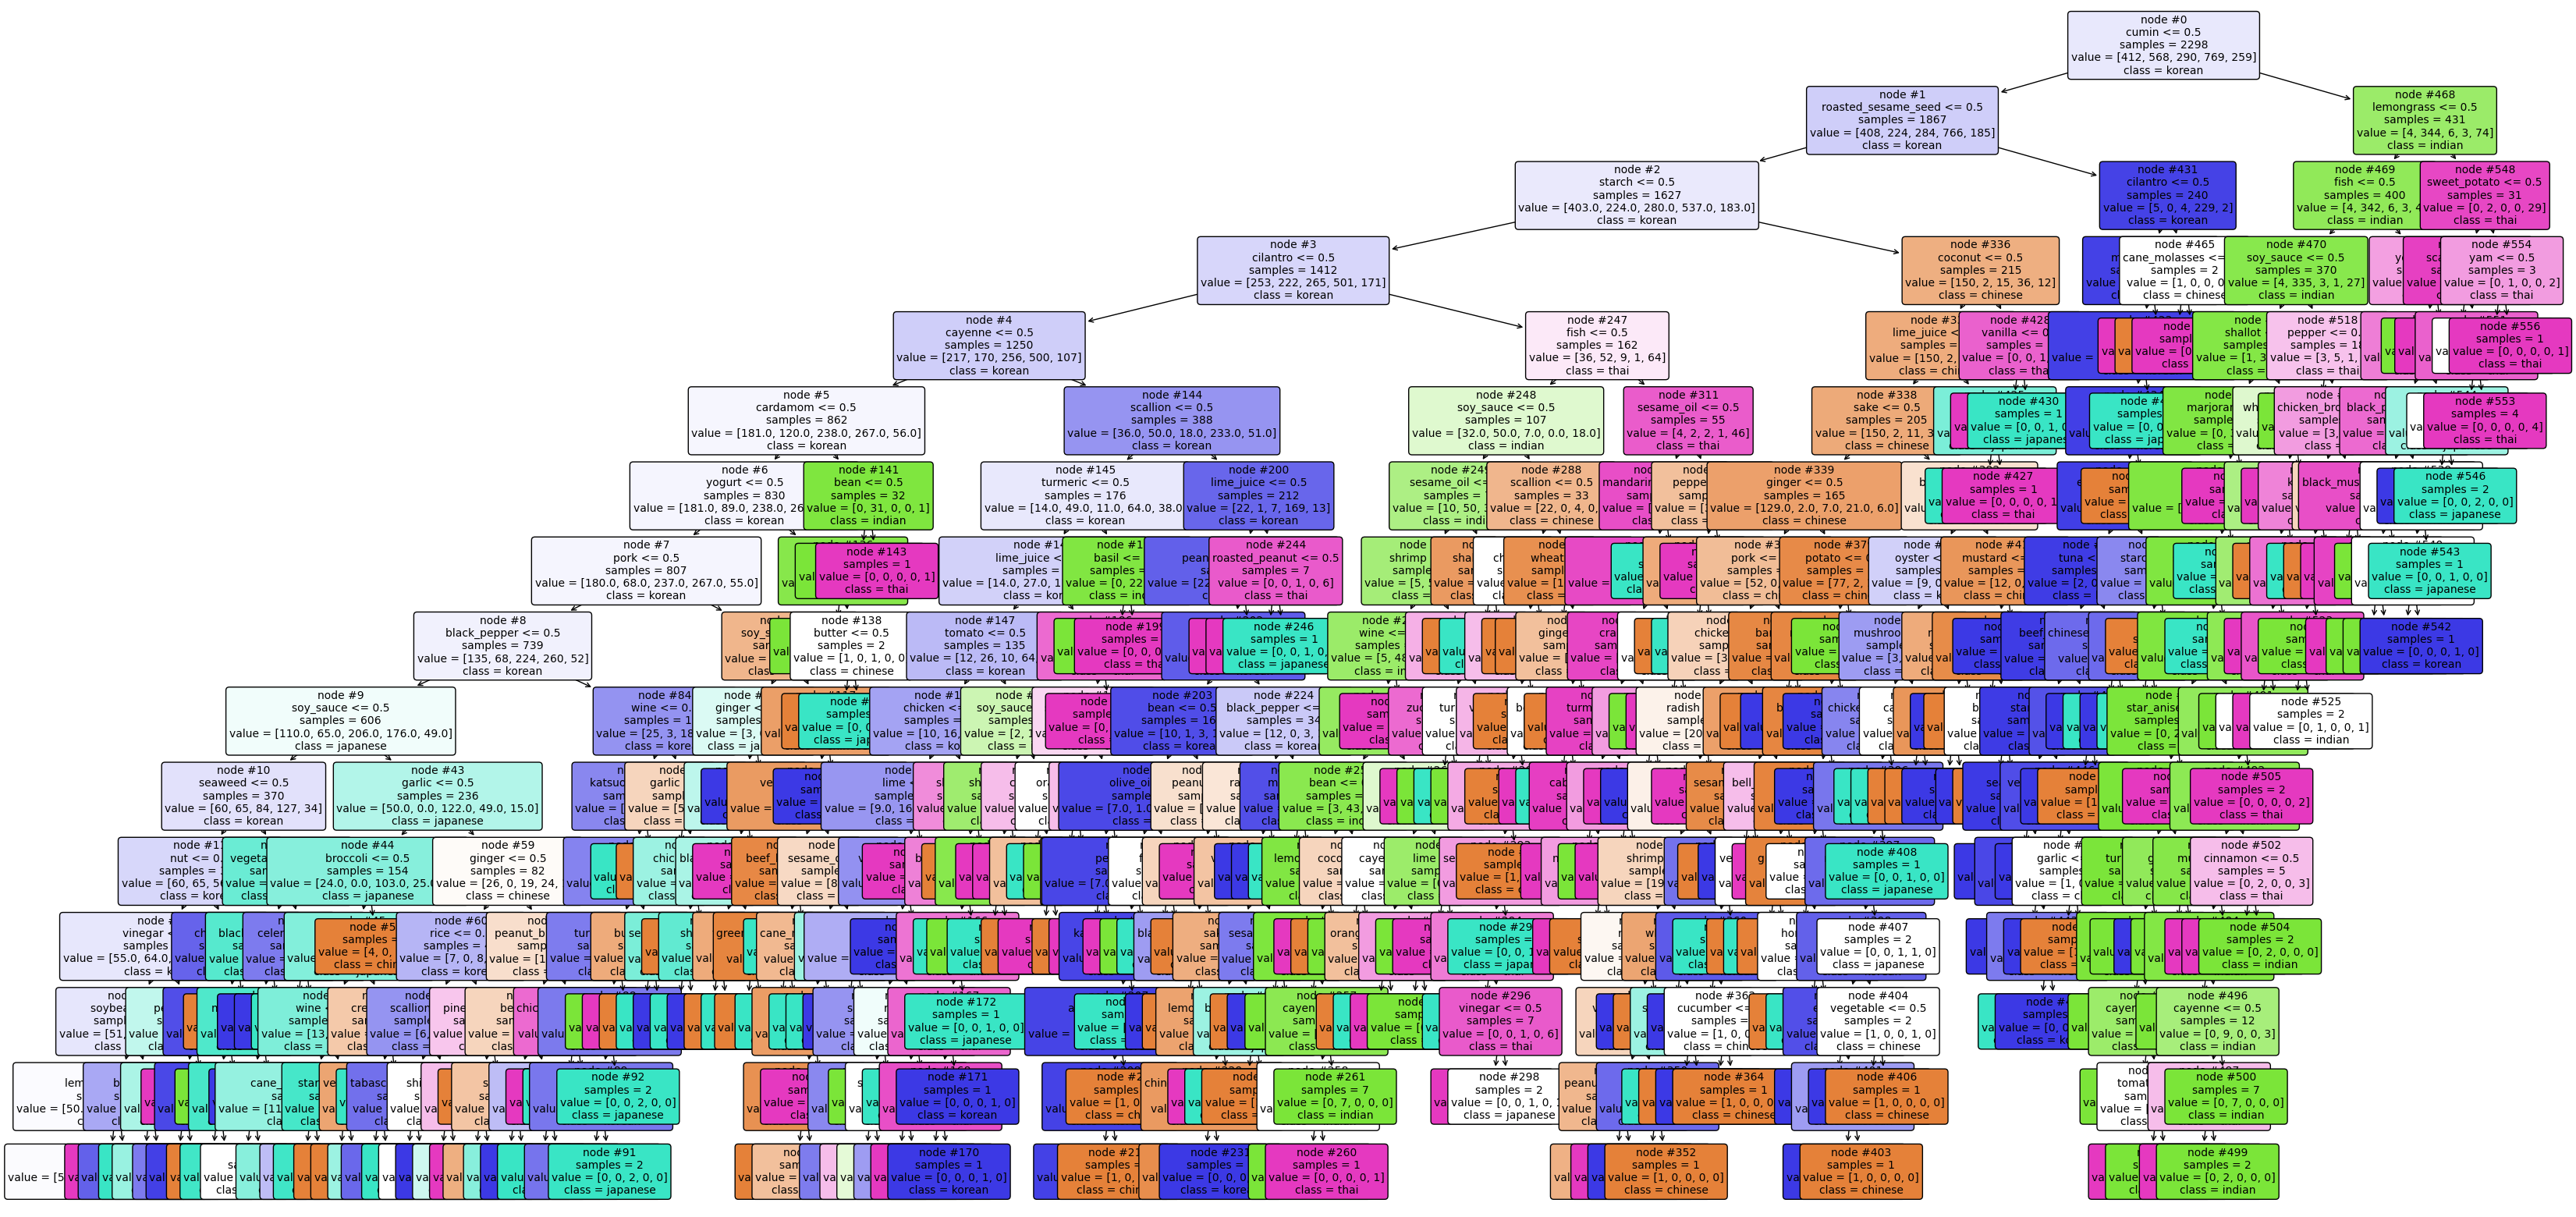

In [71]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(bamboo_train_tree, 
                   feature_names= list(bamboo_train_ingredients.columns.values),
                   class_names=np.unique(bamboo_train_cuisines),
                   filled=True, 
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded=True)
plt.show()

In [72]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredientes)
# test verilerini eğitilmiş modele yerleştirdik.

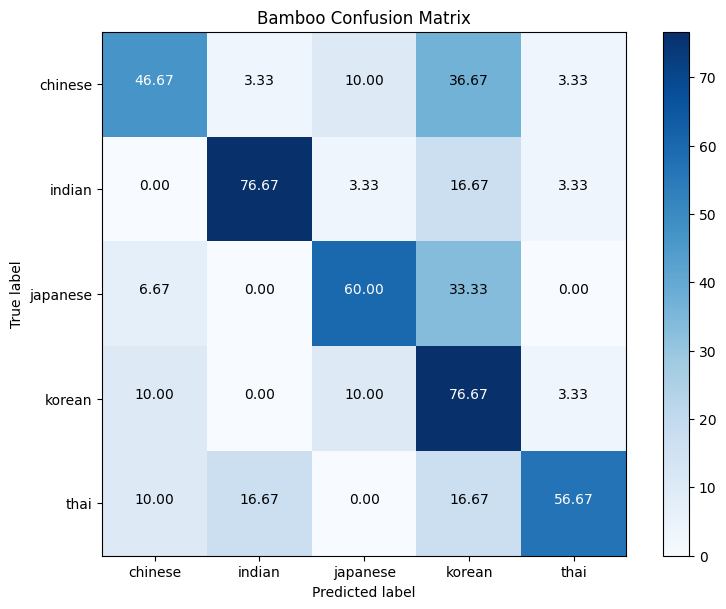

In [73]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()